In [12]:
import yfinance as yf
import pandas as pd 
import sklearn.model_selection as sk
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [13]:
data = yf.download(' aapl ',period="1y",interval="1D")
data=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)


data=pd.DataFrame(data["close"])


[*********************100%%**********************]  1 of 1 completed


In [14]:
data

,close
Date,
2022-09-22,152.740005
2022-09-23,150.429993
2022-09-26,150.770004
2022-09-27,151.759995
2022-09-28,149.839996
...,...
2023-09-18,177.970001
2023-09-19,179.070007
2023-09-20,175.490005


In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df1=pd.DataFrame(scalar.fit_transform(data),index=data.index.tolist())
df1=df1.rename({0:"close"},axis=1)
df1.index.rename("ds",inplace=True)
df1.reset_index(inplace=True)

df1

,ds,close
0,2022-09-22,-0.455971
1,2022-09-23,-0.576895
2,2022-09-26,-0.559096
3,2022-09-27,-0.507272
4,2022-09-28,-0.607780
...,...,...
247,2023-09-18,0.864761
248,2023-09-19,0.922344
249,2023-09-20,0.734939
250,2023-09-21,0.653276


In [16]:
split_index=int(len(df1)*0.8)

In [17]:
train=df1.iloc[:split_index,:]
test=df1.iloc[split_index:,:]

In [18]:
def create_time_feature(df):
    df['dayofmonth'] = df['ds'].dt.day
    df['dayofweek'] = df['ds'].dt.dayofweek
    df['quarter'] = df['ds'].dt.quarter
    df['month'] = df['ds'].dt.month
    df['year'] = df['ds'].dt.year
    df['dayofyear'] = df['ds'].dt.dayofyear
    df['weekofyear'] = df['ds'].dt.isocalendar().week
    df.index=df["ds"]
    df=df.drop("ds",axis=1)
    return df

In [19]:
train = create_time_feature(train)
test = create_time_feature(test)

train.head()

/tmp/ipykernel_45043/2096745318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofmonth'] = df['ds'].dt.day
/tmp/ipykernel_45043/2096745318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['ds'].dt.dayofweek
/tmp/ipykernel_45043/2096745318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,close,dayofmonth,dayofweek,quarter,month,year,dayofyear,weekofyear
ds,,,,,,,,
2022-09-22,-0.455971,22,3,3,9,2022,265,38
2022-09-23,-0.576895,23,4,3,9,2022,266,38
2022-09-26,-0.559096,26,0,3,9,2022,269,39
2022-09-27,-0.507272,27,1,3,9,2022,270,39
2022-09-28,-0.607780,28,2,3,9,2022,271,39


In [20]:
X_train = train.drop('close', axis =1)
y_train = train['close']

X_test = test.drop('close', axis =1)
y_test = test['close']

In [21]:

reg = xgb.XGBRegressor(n_estimators=30)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

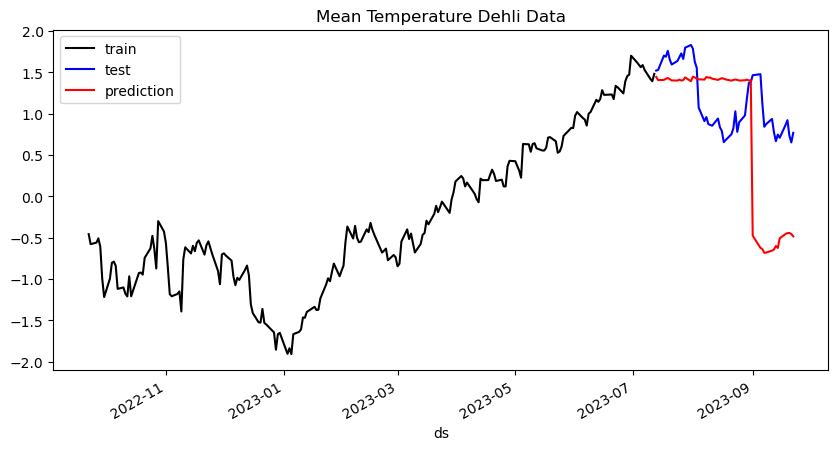

In [22]:
test['close_pred'] = reg.predict(X_test)

train['close'].plot(style='k', figsize=(10,5), label = 'train')
test['close'].plot(style='b', figsize=(10,5), label = 'test')
test['close_pred'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('Mean Temperature Dehli Data')
plt.legend()